# Empirical Application 1 Financial Econometrics

*By Daniel Deutsch, José Lucas Barretto, and Stéphane Roblet*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import statsmodels.tsa.stattools as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.arima.model import ARIMA as arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Ignore warnings
warnings.filterwarnings('ignore')

# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

# NYSE

## Load the Data

Notice that here we don't apply the log-transform in our data since it is already given in percentage.

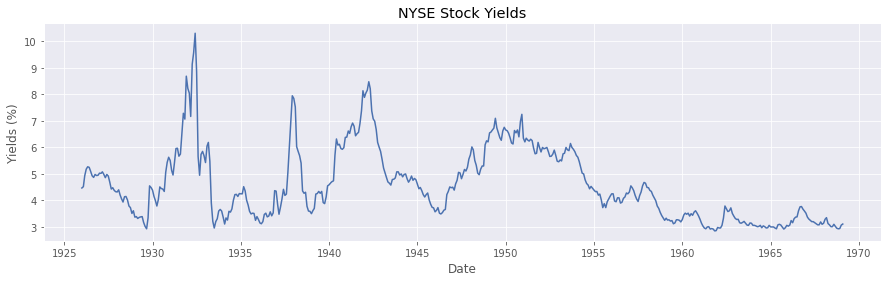

In [4]:
# Loads data and drops non available values
df_nyse = pd.read_csv("./datasets/NYSE_stock_yields.csv", names=['date', 'value'], parse_dates=['date'], skiprows=[0], na_values='.')
df_nyse.dropna(inplace=True)

# Plots the time series
plt.plot(df_nyse['date'], df_nyse['value'])
plt.title("NYSE Stock Yields")
plt.xlabel("Date")
plt.ylabel("Yields (%)")
plt.show()

## Augmented Dickey-Fuller Test

The Augmented Dickey-Fuller test is a unit root test that checks for stationarity. It considers the following hypotesis:

$
\begin{aligned}
    H_0: & \quad \text{there is a unit root (the series contains a stochastic trend and is non-stationary)} \\
    H_1: & \quad \text{there isn't a unit root (the series doesn't contain a stochastic trend and is stationary)}
\end{aligned}
$

Once the Augmented Dickey-Fuller Test is performed and we have obtained our results, we should consider the following to take our conclusions:

- If the p-value is lower than 0.05, than we must reject the null hypotesys (and, consequently, accept the alternativel one).
- If the p-value is slightly above 0.05, then the critical values should be used to judge whether to reject the null hypotesis.

<br>

First, we are going to implement the augmented Dickey-Fuller Test to the most general regression:

$
\begin{aligned}
    \Delta X_t = b_0 + b_1 t + \rho X_{t-1} + \sum^{p-1}_{j=1} \varphi_j \Delta_{t-j} + \varepsilon_t 
\end{aligned}
$

In this case, the hypotesis can be written as:

$
\begin{aligned}
    H_0: & \quad \rho = 0 \\
    H_1: & \quad \rho < 0
\end{aligned}
$

In [5]:
adf_res = sm.adfuller(df_nyse['value'], regression='ct', maxlag=12, autolag='AIC', regresults=True)

print('T-statistic: ', adf_res[0])
print('P-value: ', adf_res[1])
print('Used lags: ', adf_res[3].usedlag)
print(adf_res[3].resols.summary())

T-statistic:  -3.4096114441815564
P-value:  0.050116958198374056
Used lags:  4
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     14.88
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           1.06e-15
Time:                        15:34:59   Log-Likelihood:                -110.74
No. Observations:                 513   AIC:                             235.5
Df Residuals:                     506   BIC:                             265.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

We can see that the t-statistic is not statistically significant at a 1% risk level so we can not reject the null hypothesis. b1 (here x6) is not statistically significant.

Thus, we perform the restricted regression without the trend term.

In [6]:
adf_res = sm.adfuller(df_nyse['value'], regression='c', maxlag=12, autolag='AIC', regresults=True)
 
print('T-statistic: ', adf_res[0])
print('P-value: ', adf_res[1])
print('Used lags: ', adf_res[3].usedlag)
print(adf_res[3].resols.summary())

T-statistic:  -3.0879577428483445
P-value:  0.02745730031042599
Used lags:  4
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     17.40
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           6.53e-16
Time:                        15:34:59   Log-Likelihood:                -111.81
No. Observations:                 513   AIC:                             235.6
Df Residuals:                     507   BIC:                             261.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

We can see that the t-statistic is not statistically significant at a 1% risk level so we can not reject the null hypothesis.

b0 (here constant) is not statistically significant at a 1% risk level

Thus, we perform the restricted regression without the trend term and without the constant

In [7]:
adf_res = sm.adfuller(df_nyse['value'], regression='nc', maxlag=12, autolag='AIC', regresults=True)

print('T-statistic: ', adf_res[0])
print('P-value: ', adf_res[1])
print('Used lags: ', adf_res[3].usedlag)
print(adf_res[3].resols.summary())

T-statistic:  -1.0848432040960392
P-value:  0.2513731607012235
Used lags:  4
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.132
Model:                            OLS   Adj. R-squared (uncentered):              0.124
Method:                 Least Squares   F-statistic:                              15.51
Date:                Sun, 19 Sep 2021   Prob (F-statistic):                    3.27e-14
Time:                        15:34:59   Log-Likelihood:                         -116.03
No. Observations:                 513   AIC:                                      242.1
Df Residuals:                     508   BIC:                                      263.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t

The t-value is not statistically significant

We conclude that the series is not stationnary without a drift. 

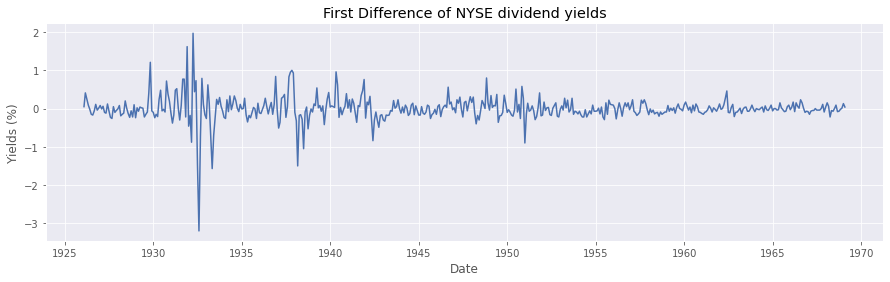

In [8]:
#We will now investigate the first difference time series in order to see if the series is I(1).
df_nyse['diff'] = df_nyse['value'].diff()

# Plots the first difference time series
plt.plot(df_nyse['date'], df_nyse['diff'])
plt.title("First Difference of NYSE Dividend Yields")
plt.xlabel("Date")
plt.ylabel("Yields (%)")
plt.show()

In [9]:
#We perform a ADF test to look for a unit root in the first difference time series.
adf_res = sm.adfuller(df_nyse['diff'].dropna(), regression='ct', maxlag=12, autolag='AIC', regresults=True)

print('t-value:', adf_res[0])
print('p-value:', adf_res[1])
print('used lags:', adf_res[3].usedlag)
print(adf_res[3].resols.summary())

ADF Results:
t-value: -6.9019835918490875
p-value: 2.3517361165049426e-08
used lags: 12
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     25.15
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           4.69e-49
Time:                        15:34:59   Log-Likelihood:                -108.70
No. Observations:                 504   AIC:                             247.4
Df Residuals:                     489   BIC:                             310.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

We can see that the t-value is statistically significant.

The b0 (constant) and b1 (trend term) are not statiscally significant, whichconfirms our previous findings.

We conclude that the time series is I(1) with no drift.

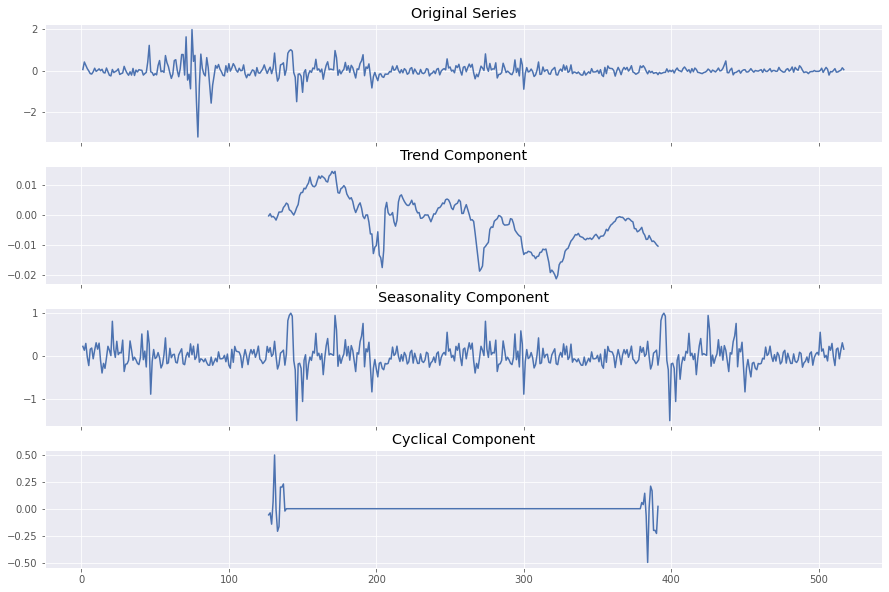

In [10]:
# Decomposition of the series :
decomposition = seasonal_decompose(df_nyse['diff'].dropna(), model='additive', period=253)
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(15, 10))

df_nyse['diff'].plot(ax=ax[0])
decomposition.trend.plot(ax=ax[1])
decomposition.seasonal.plot(ax=ax[2])
decomposition.resid.plot(ax=ax[3])

ax[0].set_title("Original Series")
ax[1].set_title("Trend Component")
ax[2].set_title("Seasonality Component")
ax[3].set_title("Cyclical Component")

plt.show()

In [11]:
#Looking for a deterministic component :
model = OLS(df_nyse['diff'].dropna(), decomposition.trend, missing='drop')
res = model.fit()
print(res.summary())
#We find that b1 is not statiscally significant

                                 OLS Regression Results                                
Dep. Variable:                   diff   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.015
Method:                 Least Squares   F-statistic:                              5.098
Date:                Sun, 19 Sep 2021   Prob (F-statistic):                      0.0248
Time:                        15:35:00   Log-Likelihood:                         -36.898
No. Observations:                 265   AIC:                                      75.80
Df Residuals:                     264   BIC:                                      79.38
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
#Looking for a seasonal component :
model = OLS(df_nyse['diff'].dropna(), decomposition.seasonal, missing='drop')
res = model.fit()
print(res.summary())
#The seasonal coefficient is statiscally significant.
#The time series has a seasonal component.

                                 OLS Regression Results                                
Dep. Variable:                   diff   R-squared (uncentered):                   0.174
Model:                            OLS   Adj. R-squared (uncentered):              0.172
Method:                 Least Squares   F-statistic:                              108.6
Date:                Sun, 19 Sep 2021   Prob (F-statistic):                    3.26e-23
Time:                        15:35:00   Log-Likelihood:                         -103.40
No. Observations:                 517   AIC:                                      208.8
Df Residuals:                     516   BIC:                                      213.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

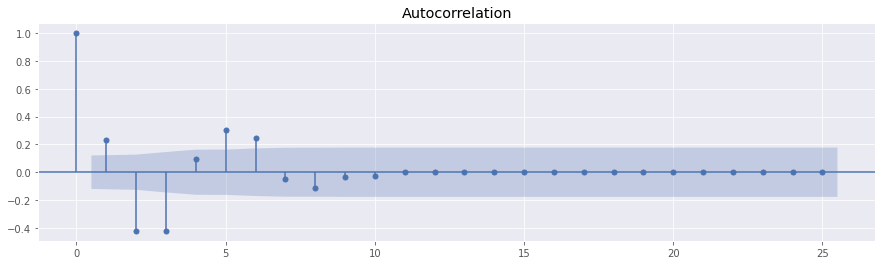

In [13]:
#Estimating q graphically with autocorrelations :
plot_acf(decomposition.resid.dropna())
plt.show()
#Graphically we can estimate q>6.

In [14]:
#We now plot a ARIMA model with the parameters previously estimated
arma_model = arima(decomposition.resid.dropna(), order=(6,0,12))
res = arma_model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  265
Model:                ARIMA(6, 0, 12)   Log Likelihood                 455.402
Date:                Sun, 19 Sep 2021   AIC                           -870.804
Time:                        15:35:02   BIC                           -799.210
Sample:                             0   HQIC                          -842.039
                                - 265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.004      0.781      0.435      -0.005       0.012
ar.L1          0.0639      2.432      0.026      0.979      -4.702       4.830
ar.L2         -0.2614      2.058     -0.127      0.8